<a href="https://colab.research.google.com/github/laahiri2005/PRODIFY-INFO-TECH/blob/main/PRODIGY_ML_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow

In [8]:
model_path = '/content/drive/MyDrive/keras_model.h5'
model = tf.keras.models.load_model(model_path)

labels_path = '/content/drive/MyDrive/labels.txt'
with open(labels_path, 'r') as file:
    class_names = file.read().splitlines()

In [9]:
def preprocess_image(image, target_size=(224, 224)):
    image = cv2.resize(image, target_size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = np.array(image, dtype=np.float32)
    image = image / 255.0  # Normalize to [0, 1]
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

In [10]:
def predict(image, model):
    preprocessed_image = preprocess_image(image)
    predictions = model.predict(preprocessed_image)
    return predictions

In [11]:
def get_prediction_label(predictions, class_names):
    predicted_class = np.argmax(predictions)
    predicted_label = class_names[predicted_class]
    confidence = predictions[0][predicted_class]
    return predicted_label, confidence

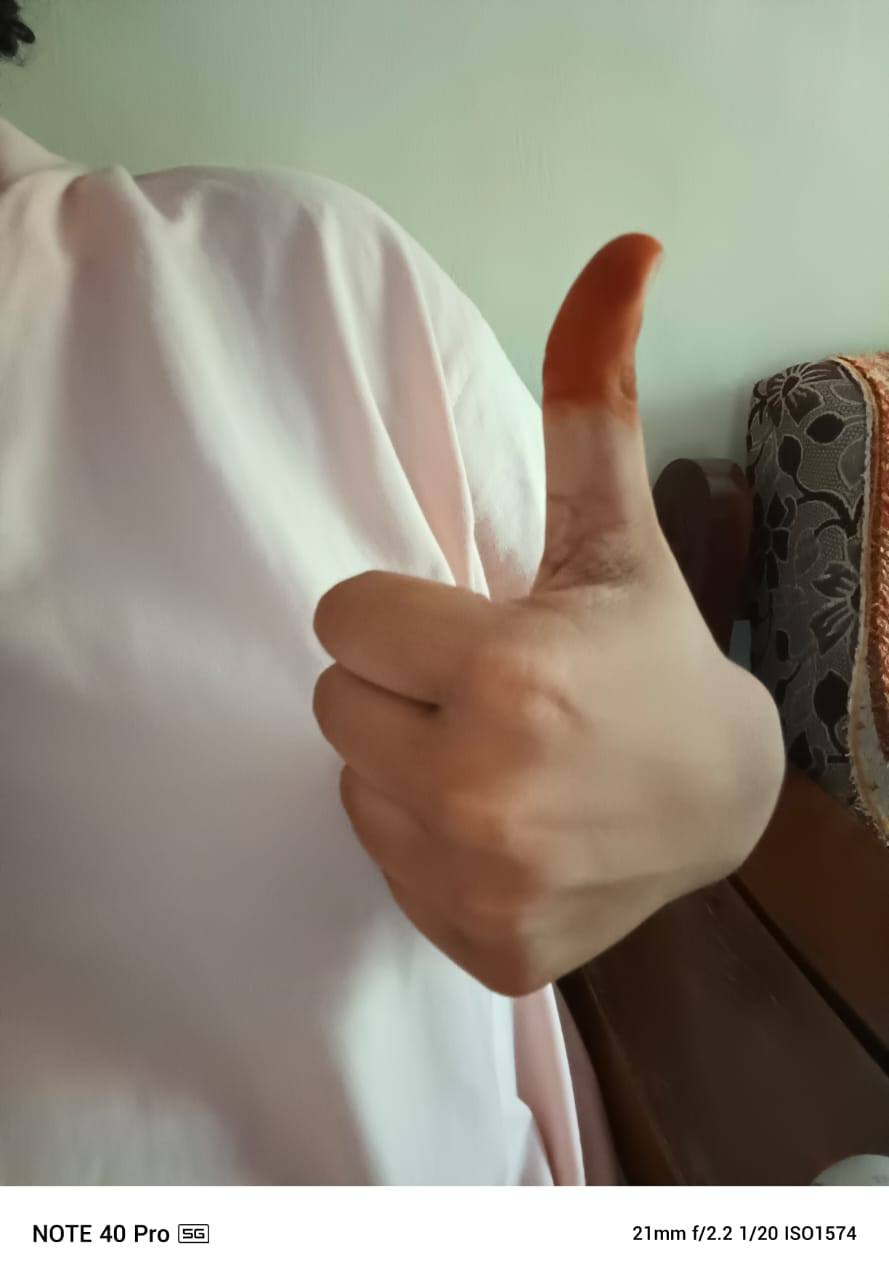

1/1 [==============================] - 0s 58ms/step
Predicted Label: 0 confidence, Confidence: 0.88


In [13]:
image_path = '/content/drive/MyDrive/handgesture1.jpeg'
image = cv2.imread(image_path)

cv2_imshow(image)

predictions = predict(image, model)
predicted_label, confidence = get_prediction_label(predictions, class_names)

print(f'Predicted Label: {predicted_label}, Confidence: {confidence:.2f}')
